In [1]:
!pip install numpy
!pip install pandas
!pip install heartpy
!pip install matplotlib.pyplot
!pip install scipy.signal


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement scipy.signal (from versions: none)
ERROR: No matching distribution found for scipy.signal

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


# import modules

In [2]:
import numpy as np
import pandas as pd
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import resample

# load data

In [3]:

# Load data
data = pd.read_csv('data5.csv', skiprows=3, header=None)
ecg = (data.iloc[:, 0] * 5) / 1023
ecg = ecg.dropna()  # Remove NaN
ecg_voltage = ecg.values

# set parameters

In [4]:
sample_rate = 19.5  # Real sample rate: 20

# Normalize cutoff frequencies for digital filter
nyquist = 0.5 * sample_rate
low_cutoff = 0.5 / nyquist
high_cutoff = 30 / nyquist

# Apply bandpass filter
filtered = hp.filter_signal(ecg_voltage, cutoff=[low_cutoff, high_cutoff], sample_rate=sample_rate, order=3, filtertype='bandpass')


# display spotted peaks

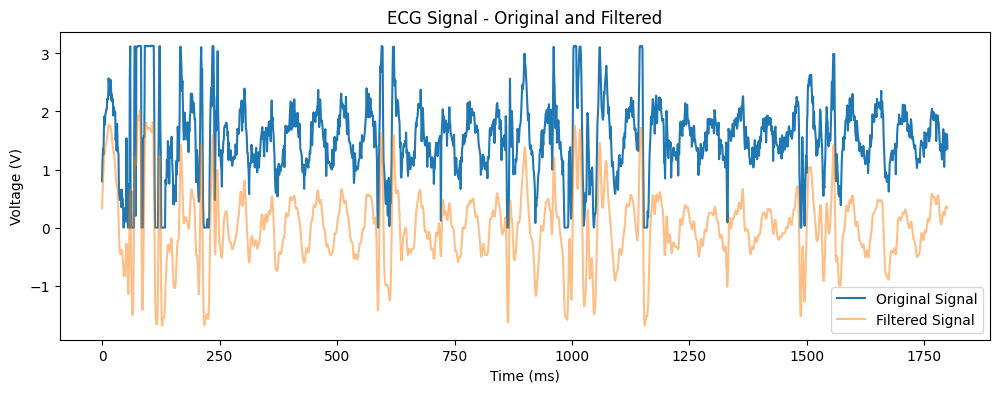

78
bpm: 78.582090
ibi: 763.532764
sdnn: 151.828064
sdsd: 57.335076
rmssd: 140.441681
pnn20: 1.000000
pnn50: 1.000000
hr_mad: 102.564103
sd1: 67.839777
sd2: 117.501941
s: 25042.594772
sd1/sd2: 0.577350
breathingrate: 0.291248


/Users/jessica/Downloads/GPT/openai-env/lib/python3.11/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1200x400 with 0 Axes>

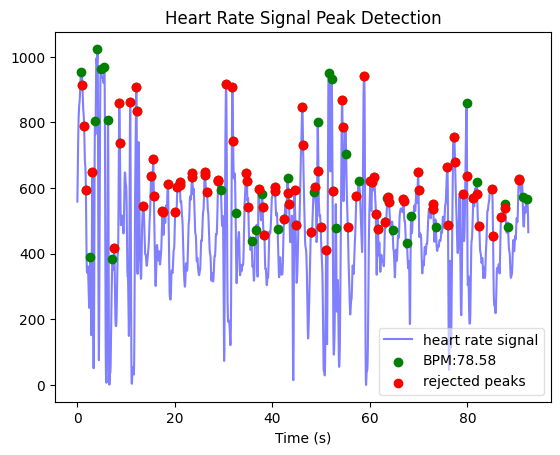

In [5]:
# Plotting signals
plt.figure(figsize=(12, 4))
plt.plot(ecg_voltage[:1800], label='Original Signal')
plt.plot(filtered[:1800], alpha=0.5, label='Filtered Signal')
plt.legend()
plt.title('ECG Signal - Original and Filtered')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.show()

# Processing the signal without resampling
wd, m = hp.process(hp.scale_data(filtered), sample_rate)

# Visualizing the processed data
plt.figure(figsize=(12, 4))
hp.plotter(wd, m)

# Displaying computed measures

bpm = int(m['bpm'])

print(bpm)
for measure in m.keys():
    print('%s: %f' % (measure, m[measure]))

# write to output txt

In [6]:
with open('USER_INPUT/USER_INPUT1.txt', 'w') as f:
    f.write(' ')
with open('USER_INPUT/USER_INPUT1.txt', 'a') as f:
    # Displaying computed measures and writing to the file
    for measure in m.keys():
        line = '%s: %f\n' % (measure, m[measure])
        #print(line, end='')  # Print to console
        f.write(line)  # Write to file

In [7]:
with open('patient_info.txt', 'a') as f:
    f.write('\n'+str(bpm))